![title](img/titanic_photo.jpg)

### Uma breve introdução sobre o Titanic:

O <b>RMS Titanic</b> foi um navio de passageiros britânico operado pela White Star Line e construído pelos estaleiros da Harland and Wolff em Belfast. Foi a segunda embarcação da Classe Olympic de transatlânticos depois do RMS Olympic e seguido pelo HMHS Britannic. Projetado pelos engenheiros navais Alexander Carlisle e Thomas Andrews, sua construção começou em março de 1909 e ele foi lançado ao mar em maio de 1911. O Titanic foi pensado para ser o navio mais luxuoso e mais seguro de sua época, gerando lendas que era supostamente <b>"inafundável"</b>.

### Qual é o objetivo desse estudo?

Aqui iremos analisar dados dos passageiros do </b>Titanic</b>, como *idade, assento, sexo, classe, etc* para tentar descobrirmos motivos pelos quais os que sobreviveram, sobreviveram. Iremos aqui tentar fazer correlações também, como por exemplo *Será que a classe alterou significativamente a chance da pessoa sobreviver?*, *Será que a idade também foi um fator importante nisso?*, etc.

Inicialmente iremos realizar uma limpeza nos dados, pois eles não estão padronizados. Após isso virão as análises e visualizações, fechando com a conlusão :-)

Nosso índice é o seguinte:

#### 1- Limpando os dados
#### 2- Realizando as análises
#### 3- Visualizando as análises
#### 4- Conclusão


In [1]:
## fazendo com que eu possa importar bibliotecas
import sys

sys.path.append('/nanodegree/anaconda2/lib/python2.7/site-packages')

### Aqui está uma legenda dos campos que iremos analisar
<pre>
VARIABLE DESCRIPTIONS:
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.
</pre>

## Importando as bibliotecas

In [42]:
%matplotlib inline
import pandas as pd # Para criarmos DataFrames
import numpy as np # Realizar alguns calculos matemáticos
import matplotlib.pyplot as plt # Para criação de gráficos
import seaborn as sns # Design de gráficos mais atraentes
import re # Para utilizar Regex
from collections import Counter

In [3]:
## primeiro vamos ler o nosso arquivo
titanic_data = pd.read_csv('titanic_data.csv', encoding='ISO-8859-1')

In [4]:
## visualizando as primeiras linhas
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


# 1- Limpando os dados

In [5]:
## substituindo NaN por -1
titanic_data = titanic_data.fillna(-1)

### Lendo essas primeiras linhas já conseguimos encontrar alguns problemas com a formatação desse arquivo, certo?
### Por exemplo, na coluna Ticket não há um padrão, o que queremos aqui são os números e não as letras. Na primeira linha temos 'A/5 21171', quando o que precisamos é somente '21171'

In [6]:
## funcao para efetuar a correcao na coluna Tickets
def corrigindo_tickets(input):
    if len(input.split(' ')) == 2:
        return input.split(' ')[1]
    else:
        return input.split(' ')[0]

In [7]:
## vamos ver quais tipos de dados o pandas identificou para a gente
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
## corrigindo
for i in titanic_data['PassengerId'] -1:
    titanic_data['Ticket'][i] = corrigindo_tickets(titanic_data['Ticket'][i])

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [9]:
## resolvemos o problema dos tickets \o/
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,21171,7.2500,-1,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,3101282,7.9250,-1,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,-1,S


### Porém ainda existe outro problema com a coluna 'Cabin'. Existem registros com mais de uma cabine para cada linha, como por exemplo: 'B51 B53 B55'. Precisamos normalizar isso e deixar um registro por linha :)

In [10]:
def corrigindo_nomes(input, pos):
        return input.split(',')[pos]

In [11]:
titanic_data['FirstName'] = '0'
titanic_data['LastName'] = '0'
for i in titanic_data['PassengerId'] -1:
    titanic_data['FirstName'][i] = corrigindo_nomes(titanic_data['Name'][i], 1)
    titanic_data['LastName'][i] = corrigindo_nomes(titanic_data['Name'][i], 0)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [12]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FirstName,LastName
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,21171,7.2500,-1,S,Mr. Owen Harris,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,17599,71.2833,C85,C,Mrs. John Bradley (Florence Briggs Thayer),Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,3101282,7.9250,-1,S,Miss. Laina,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Mrs. Jacques Heath (Lily May Peel),Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,-1,S,Mr. William Henry,Allen


#### Outra coisa que reparei quando olhei os dados, é que a coluna 'Cabin' pode possuir mais de um valor, como por exemplo: C123 C321. Nós precisamos criar uma nova linha, com todos os campos iguais, porém cada uma com uma cabine!

### Nós temos 14 colunas em nosso dataframe, sendo que a 'Cabin' é a 11ª coluna :)

In [13]:
### primeiro vou garantir que o tipo de dado na coluna 'Cabin' seja string
titanic_data['Cabin'] = titanic_data['Cabin'].astype('string')

titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
FirstName       object
LastName        object
dtype: object

In [14]:
### definindo uma função que irá efetuar a correção na coluna *cabin*
### basicamente o que é feito aqui é o seguinte: em casos que a coluna "Cabin" possui mais de um registro 
### eu divido eles no número correto e insiro novas linhas com esses valores, mantendo todas as outras colunas iguais
def corrigir_coluna(dataFrame, column):
    di = dataFrame.iterrows()
    keys = dataFrame.columns.tolist()
    dics = []
    for r in di:
        r = r[1]
        d = {}
        for key in keys:
            if (key != column):
                d[key] = r.get_value(key)
            else:
                d[key] = ''
        for v in r.get_value(column).split(' '):
            dc = d.copy()
            dc[column] = v
            dics += [dc]
    return dics

In [15]:
### atribuo à uma variável o resultado
result = corrigir_coluna(titanic_data, 'Cabin')

In [16]:
### atualizo o valor do meu DataFrame
titanic_data = pd.DataFrame(result)

In [17]:
### dados atualizados e corrigos
titanic_data.head()

,Age,Cabin,Embarked,Fare,FirstName,LastName,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22,-1,S,7.2500,Mr. Owen Harris,Braund,"Braund, Mr. Owen Harris",0,1,3,male,1,0,21171
1,38,C85,C,71.2833,Mrs. John Bradley (Florence Briggs Thayer),Cumings,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,17599
2,26,-1,S,7.9250,Miss. Laina,Heikkinen,"Heikkinen, Miss. Laina",0,3,3,female,0,1,3101282
3,35,C123,S,53.1000,Mrs. Jacques Heath (Lily May Peel),Futrelle,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
4,35,-1,S,8.0500,Mr. William Henry,Allen,"Allen, Mr. William Henry",0,5,3,male,0,0,373450


### Pronto, agora já temos nosso dado pronto para as análises :-)

# 2- Realizando e visualizando as análises

In [19]:
### vou criar agora um vetor com as colunas: Survived,PassengerId,Age,Embarked,Fare,Pclass,Sex,SibSp
survived = titanic_data['Survived']
passengers = titanic_data['PassengerId']
age = titanic_data['Age']
embarked = titanic_data['Embarked']
fare = titanic_data['Fare']
pclass = titanic_data['Pclass']
sex = titanic_data['Sex']
sibSp = titanic_data['SibSp']

In [20]:
### criando vetores agora apenas com os dados das pessoas que sobreviveram

survived_passengers = passengers[survived > 0]
survived_age = age[survived > 0]
survived_embarked = embarked[survived > 0]
survived_fare = fare[survived > 0]
survived_pclass = pclass[survived > 0]
survived_sex = sex[survived > 0]
survived_sibsb = sibSp[survived > 0]

### Vamos analisar agora as idades das pessoas que sobreviveram :)

#### Para isso vou criar uma função que detalha os dados para a gente!

In [32]:
def detalhando_os_dados(data):
    print 'Média:', np.mean(data)
    print 'Desvio Padrão:', np.std(data)
    print 'Mínimo:', np.min(data)
    print 'Máximo:', np.max(data)
    print '\n'
    
### vou aproveitar e criar uma que cria um histograma 

def criando_histograma(data):
    plt.hist(data)

In [22]:
detalhando_os_dados(survived_age)

Média: 23.797768595
Desvio Padrão: 17.040698738
Mínimo: -1.0
Máximo: 80.0


##### Podemos ver que o valor mínimo ficou com -1, isso é por conta do tratamento que fiz logo no início. Mas aqui isso altera o nosso resultado, sendo assim irei filtrar todos os vetores para os que contém apenas dados válidos! :D 

In [23]:
### além de fazer o filtro ( >= 0 ) estou aqui tranformando os vetores para o tipo Numpy

survived_passengers = np.array(survived_passengers[survived_passengers >= 0])
survived_age = np.array(survived_age[survived_age >= 0])
survived_embarked = np.array(survived_embarked[survived_embarked >= 0])
survived_fare = np.array(survived_fare[survived_fare >= 0])
survived_pclass = np.array(survived_pclass[survived_pclass >= 0])
survived_sex = np.array(survived_sex[survived_sex >= 0])
survived_sibsb = np.array(survived_sibsb[survived_sibsb >= 0])

In [29]:
### vou criar também vetores com todas as pessoas

all_passengers = np.array(survived)
all_age = np.array(age)
all_embarked = np.array(embarked)
all_fare = np.array(fare)
all_pclass = np.array(pclass)
all_sex = np.array(sex)
all_sibsb = np.array(sibSp)

In [33]:
detalhando_os_dados(survived_age)

detalhando_os_dados(all_age)

Média: 28.0373870968
Desvio Padrão: 14.7283572857
Mínimo: 0.42
Máximo: 80.0


Média: 23.6909081081
Desvio Padrão: 17.760193219
Mínimo: -1.0
Máximo: 80.0




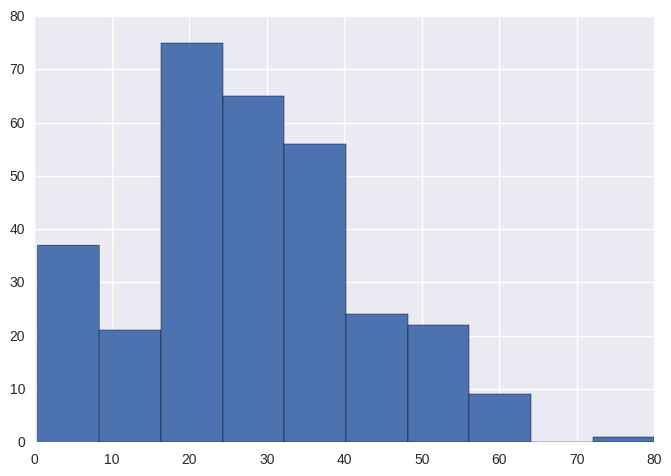

In [34]:
criando_histograma(survived_age)

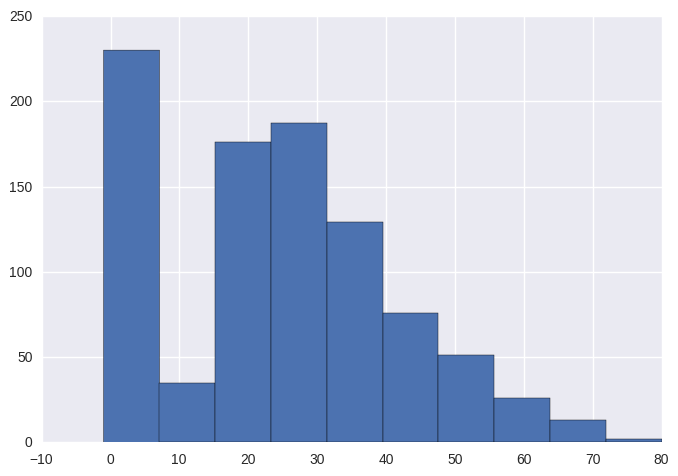

In [35]:
criando_histograma(all_age)

### Como podemos observar, a maioria das pessoas que sobreviveram tinham idade entre 20 e 40 anos, ou seja, a idade foi um fator importante (nossa distribuição não é uniforme)

### Além disso, podemos ver que grande parte dos óbitos foram de pessoas com idades inferiores à 15 anos (principalmente menor do que 10) e superiores à 60 anos.

##### Vamos realizar a mesma análise para os outros dados :)

In [36]:
## Analisando as tarifas

detalhando_os_dados(survived_fare)

detalhando_os_dados(all_fare)

Média: 58.9378793388
Desvio Padrão: 82.4094391866
Mínimo: 0.0
Máximo: 512.3292


Média: 38.1102063784
Desvio Padrão: 62.2252188713
Mínimo: 0.0
Máximo: 512.3292




### O valor médio da tarifa das pessoas que sobreviveram é superior ao do geral. Será que podemos assumir que quem tinha mais condição financeira teve mais chances de sobreviver?

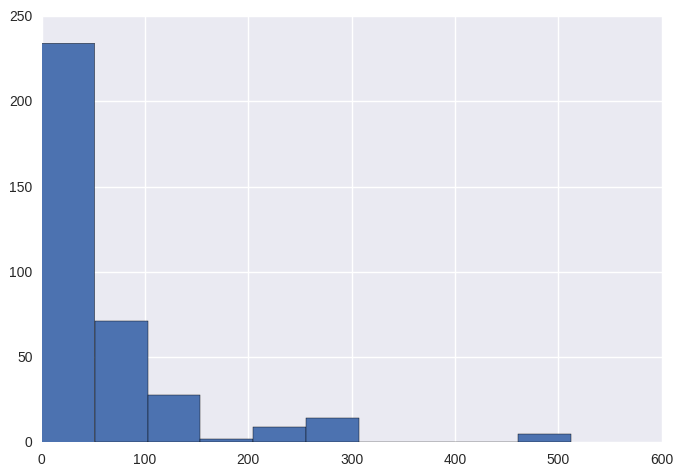

In [37]:
criando_histograma(survived_fare)

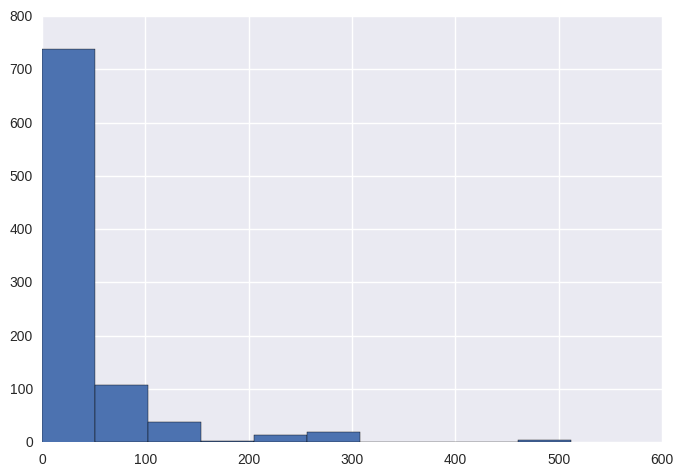

In [38]:
criando_histograma(all_fare)

### Bom, podemos ver através dos histogramas que a grande maioria dos sobreviventes foram os que pagaram as menores taxas, então já podemos responder negativamente aquela nossa dúvida anterior!

#### Vimos lá em cima que a coluna Pclass representa o classe econômica do passageiro. Vamos ver se isso foi um fator importante na sobrevivência.

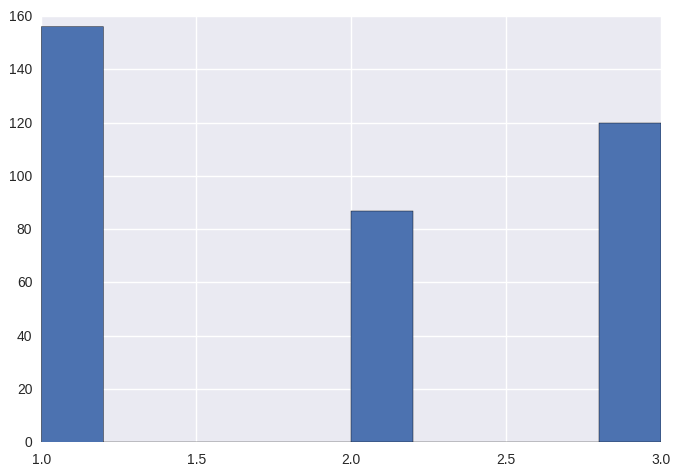

In [27]:
### Lembrando que: 1 = Upper; 2 = Middle; 3 = Lower
criando_histograma(survived_pclass)

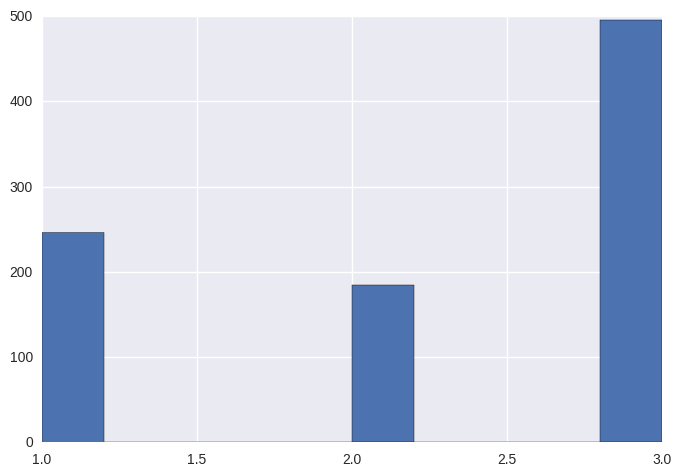

In [39]:
### Lembrando que: 1 = Upper; 2 = Middle; 3 = Lower
criando_histograma(all_pclass)

### Proporcionalmente podemos ver claramente que as pessoas de classe alta foram as que mais sobreviveram.

## Agora faremos a última análise... vamos ver com relação ao sexo das pessoas. Será que os homens tiveram mais chances de sobreviverem?

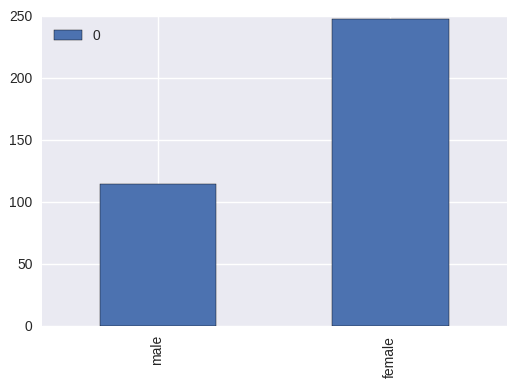

In [45]:
### como nosso vetor survived_sex é composto por strings, irei fazer diferente para plotar o histograma

survived = Counter(survived_sex)
df = pd.DataFrame.from_dict(survived, orient='index')

df.plot(kind='bar')

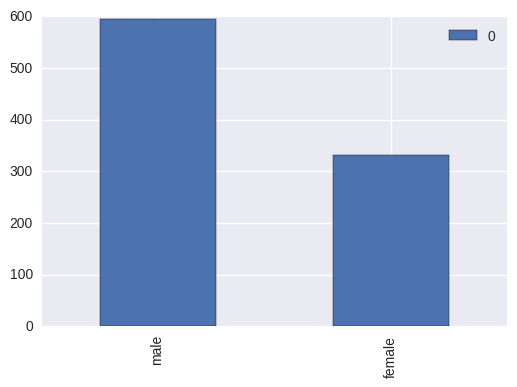

In [46]:
all_passengers = Counter(all_sex)
df = pd.DataFrame.from_dict(all_passengers, orient='index')

df.plot(kind='bar')

### Mesmo a mulher sendo fisicamente mais "frágil" do que o homem, elas obtiveram muito mais sucesso. Pouco mais de 30% faleceu, o restante não. Cenário que é totalmente o oposto do dos homens, que de 600 inicialmente, apenas ~120 sobreviveram.

### Vamos atribuir isso ao cavalheirismo dos homens, que optaram por salvar suas mulheres do que a própria vida! :P

# -----------------------------------------------------------------------------------------------------

## Após essa análise conseguimos saber um pouco mais do que veio a influenciar ou não no nosso evento estudado, sobrevivência das pessoas no maior naufrágio do mundo até os dias atuais!